In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import yaml

# Paths to the dataset splits
train_images_path = '/content/drive/MyDrive/yolov11/dataset/ensemble_masks/images/train'
val_images_path = '/content/drive/MyDrive/yolov11/dataset/ensemble_masks/images/val'
test_images_path = '/content/drive/MyDrive/yolov11/dataset/ensemble_masks/images/test'

# Define the names of your classes (adjust this list based on your dataset)
class_names = ['fish_larvae']  # Update if you have more than one class

# YAML content
data_yaml = {
    'train': train_images_path,
    'val': val_images_path,
    'test': test_images_path,
    'nc': len(class_names),  # Number of classes
    'names': class_names     # Class names
}

# Output path for the YAML file
output_yaml_path = '/content/drive/MyDrive/yolov11/dataset/ensemble_masks/data.yaml'

# Write the YAML file
with open(output_yaml_path, 'w') as file:
    yaml.dump(data_yaml, file, default_flow_style=False)

print(f"YAML file created at {output_yaml_path}")

YAML file created at /content/drive/MyDrive/yolov11/dataset/ensemble_masks/data.yaml


In [ ]:
!nvidia-smi

Fri Jan 17 04:35:13 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install opencv-python ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.1/910.1 kB 14.6 MB/s eta 0:00:00


In [ ]:
import cv2
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Load a COCO-pretrained YOLO11n model
model = YOLO("yolo11n.pt")

results = model.train(
    data="/content/drive/MyDrive/yolov11/dataset/ensemble_masks/data.yaml",
    epochs=100,
    imgsz=640,
    project="/content/drive/MyDrive/yolov11/runs/",
    name="ensemble_masks"  # Change name for each dataset experiment
)


100%|██████████| 5.35M/5.35M [00:00<00:00, 159MB/s]


Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/yolov11/dataset/ensemble_masks/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/yolov11/runs/, name=ensemble_masks2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False

100%|██████████| 755k/755k [00:00<00:00, 41.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/yolov11/dataset/ensemble_masks/labels/train.cache... 2021 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2021/2021 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/yolov11/dataset/ensemble_masks/labels/val.cache... 578 images, 0 backgrounds, 0 corrupt: 100%|██████████| 578/578 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/yolov11/runs/ensemble_masks2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/yolov11/runs/ensemble_masks2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       2.4G       1.04      1.503     0.9304         24        640: 100%|██████████| 127/127 [00:24<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:25<00:00,  1.36s/it]


                   all        578       1784       0.97      0.962      0.976      0.766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.44G     0.8351     0.8126     0.8809          7        640: 100%|██████████| 127/127 [00:20<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.13it/s]

                   all        578       1784      0.951      0.953      0.974       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.44G     0.8231      0.665     0.8842         23        640: 100%|██████████| 127/127 [00:20<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.98it/s]

                   all        578       1784      0.948      0.957      0.973      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.44G     0.7924     0.5848     0.8754         30        640: 100%|██████████| 127/127 [00:20<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.34it/s]

                   all        578       1784      0.967      0.957      0.977      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.45G     0.7627     0.5323     0.8698         15        640: 100%|██████████| 127/127 [00:20<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.11it/s]

                   all        578       1784      0.962      0.966      0.976      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.44G     0.7436     0.5031     0.8657         21        640: 100%|██████████| 127/127 [00:20<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.42it/s]

                   all        578       1784       0.97      0.971      0.979      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.44G     0.7235     0.4813     0.8567         35        640: 100%|██████████| 127/127 [00:20<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.19it/s]

                   all        578       1784      0.969      0.972      0.974      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.45G     0.7136     0.4653      0.862         19        640: 100%|██████████| 127/127 [00:20<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.08it/s]

                   all        578       1784      0.972      0.963      0.977      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.45G     0.6986     0.4561     0.8581         18        640: 100%|██████████| 127/127 [00:20<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.30it/s]

                   all        578       1784      0.972      0.966      0.979      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.45G     0.6812     0.4372     0.8527         16        640: 100%|██████████| 127/127 [00:20<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.09it/s]

                   all        578       1784      0.972      0.974      0.982      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.44G     0.6829     0.4369     0.8535         13        640: 100%|██████████| 127/127 [00:20<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.14it/s]

                   all        578       1784      0.978      0.964      0.975      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.45G     0.6735     0.4278     0.8566         29        640: 100%|██████████| 127/127 [00:21<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.79it/s]

                   all        578       1784      0.973      0.966      0.978      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.42G     0.6694     0.4253     0.8519         22        640: 100%|██████████| 127/127 [00:20<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.10it/s]

                   all        578       1784      0.967      0.975      0.983      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.44G     0.6684     0.4178      0.853         23        640: 100%|██████████| 127/127 [00:20<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.59it/s]

                   all        578       1784      0.966      0.978      0.981      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.43G     0.6579     0.4107     0.8484         11        640: 100%|██████████| 127/127 [00:21<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.07it/s]

                   all        578       1784      0.975      0.967      0.974      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.44G     0.6527     0.4139     0.8513         27        640: 100%|██████████| 127/127 [00:21<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.63it/s]

                   all        578       1784      0.979      0.975      0.983       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.44G     0.6504     0.4016     0.8479         30        640: 100%|██████████| 127/127 [00:20<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.34it/s]

                   all        578       1784      0.969      0.969      0.978      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.45G     0.6349     0.3967     0.8496         26        640: 100%|██████████| 127/127 [00:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.20it/s]

                   all        578       1784      0.973       0.97      0.978       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.44G     0.6341     0.3921     0.8458         21        640: 100%|██████████| 127/127 [00:20<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.35it/s]

                   all        578       1784      0.973      0.978      0.981      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.47G     0.6365     0.3878     0.8455         11        640: 100%|██████████| 127/127 [00:20<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.29it/s]

                   all        578       1784      0.974      0.973       0.98      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.42G     0.6421     0.3919     0.8513         35        640: 100%|██████████| 127/127 [00:20<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.95it/s]

                   all        578       1784      0.978      0.974      0.976      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.45G     0.6288     0.3859     0.8433         24        640: 100%|██████████| 127/127 [00:20<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.10it/s]

                   all        578       1784      0.968      0.976      0.977      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.44G     0.6282     0.3861     0.8465         18        640: 100%|██████████| 127/127 [00:20<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.94it/s]

                   all        578       1784      0.973      0.975      0.981      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.44G     0.6248     0.3855     0.8418         24        640: 100%|██████████| 127/127 [00:20<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.32it/s]

                   all        578       1784      0.976      0.975      0.981      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.45G     0.6187     0.3784      0.841         21        640: 100%|██████████| 127/127 [00:20<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.84it/s]

                   all        578       1784      0.974      0.977       0.98      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.44G     0.6203     0.3794     0.8454         20        640: 100%|██████████| 127/127 [00:20<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.25it/s]

                   all        578       1784      0.969      0.972      0.981      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.44G     0.6146     0.3739     0.8424         24        640: 100%|██████████| 127/127 [00:20<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.07it/s]

                   all        578       1784      0.976      0.974      0.983      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.45G     0.6019     0.3668      0.839         22        640: 100%|██████████| 127/127 [00:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.29it/s]

                   all        578       1784      0.972      0.979      0.982      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.44G     0.6179     0.3704     0.8446         32        640: 100%|██████████| 127/127 [00:20<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.16it/s]

                   all        578       1784       0.97      0.973       0.98       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.45G     0.6016     0.3633       0.84         14        640: 100%|██████████| 127/127 [00:20<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.19it/s]

                   all        578       1784      0.981      0.975      0.984      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.43G     0.5972       0.36     0.8372         35        640: 100%|██████████| 127/127 [00:20<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.21it/s]

                   all        578       1784      0.981      0.975       0.98      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.44G     0.6025     0.3566     0.8372         20        640: 100%|██████████| 127/127 [00:20<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.94it/s]

                   all        578       1784      0.979      0.972       0.98      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.44G     0.6015     0.3547     0.8401         26        640: 100%|██████████| 127/127 [00:20<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.22it/s]

                   all        578       1784      0.981      0.969      0.978      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.45G     0.5907     0.3547     0.8387         19        640: 100%|██████████| 127/127 [00:20<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.02it/s]

                   all        578       1784      0.974      0.978      0.985       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.43G     0.5898     0.3537     0.8349         21        640: 100%|██████████| 127/127 [00:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.27it/s]

                   all        578       1784      0.974      0.977      0.982      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.45G     0.5895     0.3522     0.8355         35        640: 100%|██████████| 127/127 [00:20<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.11it/s]

                   all        578       1784       0.98      0.978      0.983      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.45G     0.5812     0.3478     0.8383         14        640: 100%|██████████| 127/127 [00:20<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.11it/s]

                   all        578       1784       0.98      0.978      0.982      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.45G     0.5893     0.3506     0.8367         12        640: 100%|██████████| 127/127 [00:20<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.01it/s]

                   all        578       1784      0.977      0.978      0.983      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.44G     0.5791     0.3397     0.8338         19        640: 100%|██████████| 127/127 [00:20<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.11it/s]

                   all        578       1784      0.973      0.976       0.98      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.45G     0.5857       0.34     0.8356         24        640: 100%|██████████| 127/127 [00:20<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.21it/s]

                   all        578       1784      0.981      0.975      0.983      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.47G     0.5769     0.3436     0.8345         14        640: 100%|██████████| 127/127 [00:20<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.15it/s]

                   all        578       1784      0.979      0.974      0.983      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.43G     0.5849     0.3418     0.8352         29        640: 100%|██████████| 127/127 [00:20<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.32it/s]

                   all        578       1784      0.978      0.978      0.984      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.43G     0.5852      0.341      0.835         30        640: 100%|██████████| 127/127 [00:20<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.02it/s]

                   all        578       1784      0.973      0.977      0.977      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.45G     0.5887     0.3408     0.8381         35        640: 100%|██████████| 127/127 [00:20<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.28it/s]

                   all        578       1784      0.977      0.972      0.983      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.44G      0.578       0.34     0.8388         22        640: 100%|██████████| 127/127 [00:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.95it/s]

                   all        578       1784      0.976      0.976      0.983      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.44G     0.5743     0.3344     0.8327         17        640: 100%|██████████| 127/127 [00:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.26it/s]

                   all        578       1784      0.976      0.975       0.98      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.43G     0.5732      0.336     0.8334         28        640: 100%|██████████| 127/127 [00:20<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.19it/s]

                   all        578       1784      0.983      0.974      0.983      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.44G     0.5667     0.3323     0.8346         33        640: 100%|██████████| 127/127 [00:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.37it/s]

                   all        578       1784      0.985      0.979      0.983      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.44G     0.5643     0.3288     0.8294         25        640: 100%|██████████| 127/127 [00:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.20it/s]

                   all        578       1784      0.981      0.979      0.983      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.47G     0.5654     0.3261     0.8348         29        640: 100%|██████████| 127/127 [00:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.21it/s]

                   all        578       1784      0.981       0.98      0.983      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.43G     0.5641     0.3254     0.8297         29        640: 100%|██████████| 127/127 [00:20<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.21it/s]

                   all        578       1784      0.987      0.974      0.985      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.44G     0.5517     0.3244     0.8317         33        640: 100%|██████████| 127/127 [00:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.11it/s]

                   all        578       1784      0.986      0.974      0.982      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.44G     0.5703     0.3299     0.8359         24        640: 100%|██████████| 127/127 [00:20<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.17it/s]

                   all        578       1784      0.987      0.979      0.985      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.47G      0.556     0.3233     0.8295         20        640: 100%|██████████| 127/127 [00:20<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.06it/s]

                   all        578       1784      0.991      0.975      0.984      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.44G     0.5501     0.3199     0.8294         19        640: 100%|██████████| 127/127 [00:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.29it/s]

                   all        578       1784      0.986      0.976      0.985      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.45G     0.5501     0.3171     0.8324         32        640: 100%|██████████| 127/127 [00:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.12it/s]

                   all        578       1784      0.984      0.979      0.984      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.45G     0.5555     0.3193     0.8319         31        640: 100%|██████████| 127/127 [00:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.27it/s]

                   all        578       1784      0.988      0.973      0.985      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.45G     0.5544     0.3184     0.8284         11        640: 100%|██████████| 127/127 [00:20<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.16it/s]

                   all        578       1784      0.987      0.976      0.985      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.44G     0.5441     0.3131     0.8276         20        640: 100%|██████████| 127/127 [00:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.21it/s]

                   all        578       1784      0.984      0.975      0.985       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.47G     0.5422      0.313      0.827         24        640: 100%|██████████| 127/127 [00:20<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.33it/s]

                   all        578       1784      0.987      0.978      0.984      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.45G     0.5474     0.3172     0.8308         21        640: 100%|██████████| 127/127 [00:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.14it/s]

                   all        578       1784      0.986      0.979      0.985      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.45G      0.543     0.3144     0.8326         17        640: 100%|██████████| 127/127 [00:20<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.23it/s]

                   all        578       1784      0.986      0.976      0.985      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.44G     0.5341     0.3067     0.8249         11        640: 100%|██████████| 127/127 [00:20<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  4.91it/s]

                   all        578       1784      0.986      0.978      0.984      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.47G     0.5392     0.3104     0.8256         22        640: 100%|██████████| 127/127 [00:20<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.23it/s]

                   all        578       1784      0.988      0.975      0.986      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.45G     0.5404     0.3136     0.8274         21        640: 100%|██████████| 127/127 [00:20<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.05it/s]

                   all        578       1784      0.983      0.977      0.985      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.45G     0.5377     0.3101     0.8279         21        640: 100%|██████████| 127/127 [00:20<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.36it/s]

                   all        578       1784      0.978      0.978      0.983      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.43G     0.5333     0.3067     0.8277         27        640: 100%|██████████| 127/127 [00:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.16it/s]

                   all        578       1784      0.988      0.977      0.985      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.45G     0.5208     0.2997     0.8234         28        640: 100%|██████████| 127/127 [00:20<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.19it/s]

                   all        578       1784      0.986      0.977      0.985      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.45G     0.5251     0.3024     0.8222         24        640: 100%|██████████| 127/127 [00:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.29it/s]

                   all        578       1784       0.99      0.973      0.986      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.42G     0.5297     0.2998     0.8255         24        640: 100%|██████████| 127/127 [00:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.21it/s]

                   all        578       1784      0.987      0.978      0.984      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.45G     0.5263     0.2995     0.8238         14        640: 100%|██████████| 127/127 [00:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.31it/s]

                   all        578       1784      0.985      0.979      0.986      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.44G     0.5205     0.2959     0.8266         19        640: 100%|██████████| 127/127 [00:20<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.14it/s]

                   all        578       1784      0.984      0.978      0.985      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.44G     0.5164     0.2943     0.8236         27        640: 100%|██████████| 127/127 [00:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.38it/s]

                   all        578       1784      0.991      0.974      0.985      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.45G     0.5279     0.2968     0.8266         11        640: 100%|██████████| 127/127 [00:20<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.06it/s]

                   all        578       1784      0.988      0.979      0.985      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.43G     0.5191     0.2934     0.8234         22        640: 100%|██████████| 127/127 [00:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.28it/s]

                   all        578       1784      0.986      0.976      0.984      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.44G     0.5192     0.2914     0.8221         27        640: 100%|██████████| 127/127 [00:20<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.12it/s]

                   all        578       1784      0.986      0.978      0.985      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.45G     0.5067     0.2853     0.8222         32        640: 100%|██████████| 127/127 [00:20<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.35it/s]

                   all        578       1784      0.988      0.978      0.986      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.44G     0.5141     0.2899     0.8236         23        640: 100%|██████████| 127/127 [00:20<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.24it/s]

                   all        578       1784      0.988      0.978      0.986      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.43G     0.5146     0.2917     0.8233         23        640: 100%|██████████| 127/127 [00:20<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.20it/s]

                   all        578       1784      0.987       0.98      0.985      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.45G     0.5065     0.2851     0.8235         14        640: 100%|██████████| 127/127 [00:20<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.40it/s]

                   all        578       1784      0.988      0.976      0.986      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.45G      0.508     0.2858     0.8199         18        640: 100%|██████████| 127/127 [00:20<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.16it/s]

                   all        578       1784      0.988      0.977      0.986      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.45G     0.5152     0.2861     0.8232         15        640: 100%|██████████| 127/127 [00:20<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.43it/s]

                   all        578       1784      0.988       0.98      0.986      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.44G     0.5031     0.2819     0.8211         12        640: 100%|██████████| 127/127 [00:20<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.18it/s]

                   all        578       1784      0.986      0.979      0.986      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.44G     0.5096     0.2857     0.8234         29        640: 100%|██████████| 127/127 [00:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.35it/s]

                   all        578       1784      0.986      0.981      0.986        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.44G     0.5028       0.28     0.8212         20        640: 100%|██████████| 127/127 [00:20<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.02it/s]

                   all        578       1784      0.985       0.98      0.985      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.45G     0.5033     0.2797     0.8224         31        640: 100%|██████████| 127/127 [00:20<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.31it/s]

                   all        578       1784      0.987      0.976      0.985      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.43G     0.4925     0.2741     0.8224         19        640: 100%|██████████| 127/127 [00:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.12it/s]

                   all        578       1784       0.99      0.976      0.986      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.47G      0.501     0.2767     0.8188         23        640: 100%|██████████| 127/127 [00:20<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.31it/s]

                   all        578       1784      0.988      0.975      0.986      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.47G     0.4928     0.2737     0.8186         30        640: 100%|██████████| 127/127 [00:20<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.24it/s]

                   all        578       1784      0.987      0.975      0.986      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.45G     0.4951     0.2756     0.8177         18        640: 100%|██████████| 127/127 [00:20<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.25it/s]

                   all        578       1784       0.99      0.975      0.985      0.899


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.41G     0.4565     0.2583     0.8135         17        640: 100%|██████████| 127/127 [00:21<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.32it/s]

                   all        578       1784      0.987      0.976      0.985      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.42G     0.4514     0.2521     0.8121         17        640: 100%|██████████| 127/127 [00:20<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.10it/s]

                   all        578       1784      0.989      0.975      0.985      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.42G     0.4483      0.251     0.8107         12        640: 100%|██████████| 127/127 [00:20<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.39it/s]

                   all        578       1784      0.987      0.978      0.986      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.42G     0.4503     0.2497     0.8104         18        640: 100%|██████████| 127/127 [00:20<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.07it/s]

                   all        578       1784      0.989      0.978      0.987      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.41G     0.4484     0.2493     0.8114         13        640: 100%|██████████| 127/127 [00:20<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.32it/s]

                   all        578       1784      0.989      0.978      0.986       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.42G     0.4454     0.2473     0.8107         14        640: 100%|██████████| 127/127 [00:20<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.06it/s]

                   all        578       1784      0.988      0.977      0.986      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.42G     0.4413     0.2458     0.8103         15        640: 100%|██████████| 127/127 [00:20<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.36it/s]

                   all        578       1784      0.986       0.98      0.986      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.42G     0.4364     0.2413     0.8101          9        640: 100%|██████████| 127/127 [00:20<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.01it/s]

                   all        578       1784      0.992      0.975      0.986      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.41G     0.4359     0.2406     0.8094         13        640: 100%|██████████| 127/127 [00:20<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.32it/s]

                   all        578       1784      0.989      0.979      0.986      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.42G     0.4339     0.2388      0.806         16        640: 100%|██████████| 127/127 [00:20<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.01it/s]

                   all        578       1784      0.991      0.975      0.986      0.912



100 epochs completed in 0.701 hours.
Optimizer stripped from /content/drive/MyDrive/yolov11/runs/ensemble_masks2/weights/last.pt, 5.5MB
Optimizer stripped from /content/drive/MyDrive/yolov11/runs/ensemble_masks2/weights/best.pt, 5.5MB

Validating /content/drive/MyDrive/yolov11/runs/ensemble_masks2/weights/best.pt...
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.19it/s]


                   all        578       1784      0.992      0.975      0.986      0.913
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to /content/drive/MyDrive/yolov11/runs/ensemble_masks2


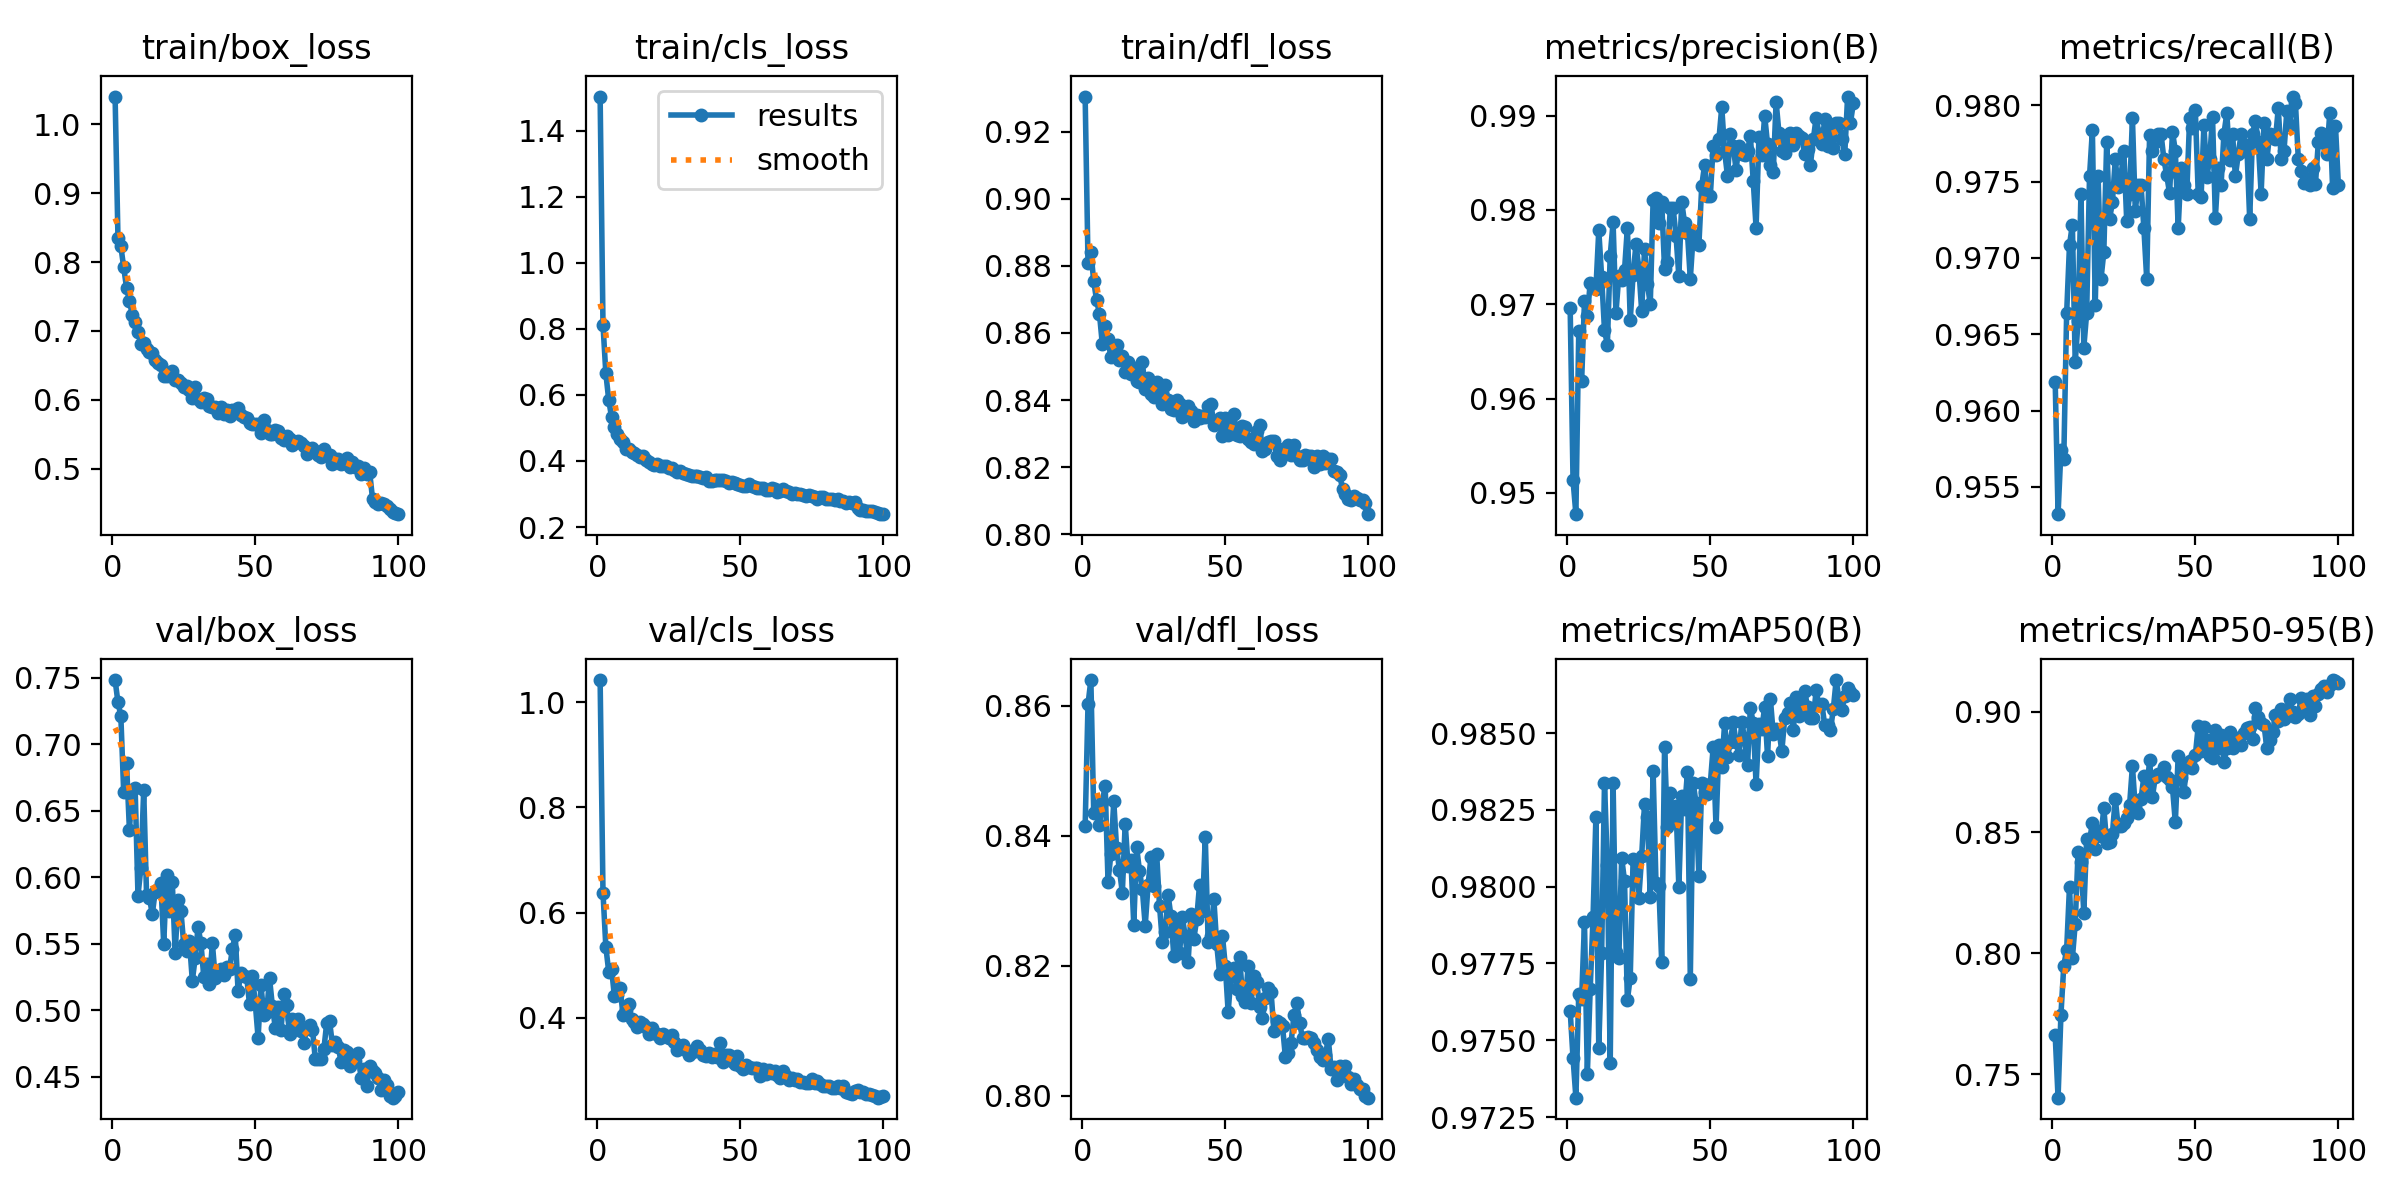

In [ ]:
from IPython.display import Image, display

# Display the results plot from the runs/detect/train directory
display(Image(filename="/content/drive/MyDrive/yolov11/runs/ensemble_masks2/results.png"))


In [ ]:
import pandas as pd
import glob

# Locate the latest results CSV file in the detect or train directory
latest_exp = sorted(glob.glob("/content/drive/MyDrive/yolov11/runs/ensemble_masks*"))[-1]
results_csv = f"{latest_exp}/results.csv"

# Load the CSV file
results_df = pd.read_csv(results_csv)

# Display the metrics available in the results.csv file
print("Available Metrics:\n", results_df.columns)
print(results_df.tail())  # Display metrics from the final epochs


Available Metrics:
 Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')
    epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
95     96  2425.78         0.44542         0.24727         0.81074   
96     97  2450.20         0.44129         0.24581         0.81034   
97     98  2474.91         0.43638         0.24125         0.81012   
98     99  2499.39         0.43586         0.24057         0.80944   
99    100  2524.03         0.43393         0.23883         0.80602   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
95               0.98753            0.97684           0.98576   
96               0.98590            0.97950           0.98622   
97               0.99201            0.97455           0.98646   
98         

In [ ]:
# Display metrics for the final epoch
final_metrics = results_df.iloc[-1]  # Get the last row for the final epoch

print("Final Epoch Metrics:")
print(f"Precision: {final_metrics['metrics/precision(B)']}")
print(f"Recall: {final_metrics['metrics/recall(B)']}")
print(f"mAP@0.5: {final_metrics['metrics/mAP50(B)']}")
print(f"mAP@0.5:0.95: {final_metrics['metrics/mAP50-95(B)']}")



Final Epoch Metrics:
Precision: 0.99131
Recall: 0.97478
mAP@0.5: 0.98625
mAP@0.5:0.95: 0.91179


In [ ]:
import os
import json

# Load the trained model
model = YOLO("/content/drive/MyDrive/yolov11/runs/ensemble_masks2/weights/best.pt")  # Replace with the path to your trained weights

# Define the path to your images directory
image_dir = "/content/drive/MyDrive/yolov11/dataset/ensemble_masks/images/test"
pred_counts = {}  # Dictionary to store predicted counts

# Run inference on each image in the test folder
for image_file in os.listdir(image_dir):
    image_path = os.path.join(image_dir, image_file)

    # Perform inference with YOLO model
    results = model(image_path)

    # Count detected objects (bounding boxes)
    num_boxes = len(results[0].boxes)

    # Save count with image name
    image_name = image_file.split('.')[0]
    pred_counts[image_name] = num_boxes

# Save predicted counts to a JSON file for comparison
output_file = '/content/drive/MyDrive/yolov11/dataset/ensemble_masks/predicted_fish_counts.json'
with open(output_file, 'w') as json_file:
    json.dump(pred_counts, json_file)

print(f"Predicted fish counts saved to {output_file}")



image 1/1 /content/drive/MyDrive/yolov11/dataset/ensemble_masks/images/test/01_img114.png: 640x640 4 fish_larvaes, 8.9ms
Speed: 5.1ms preprocess, 8.9ms inference, 743.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/yolov11/dataset/ensemble_masks/images/test/01_img119.png: 640x640 4 fish_larvaes, 9.3ms
Speed: 2.1ms preprocess, 9.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/yolov11/dataset/ensemble_masks/images/test/01_img143.png: 640x640 4 fish_larvaes, 10.5ms
Speed: 2.3ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/yolov11/dataset/ensemble_masks/images/test/01_img152.png: 640x640 4 fish_larvaes, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/yolov11/dataset/ensemble_masks/images/test/01_img164.png: 640x640 4 fish_larvaes, 9.9ms
Sp

In [ ]:
# Example dictionary of true counts and predictions
true_counts = {
  "test/01_img19": 4, "test/01_img184": 3, "test/01_img143": 4, "test/01_img170": 3, "test/01_img114": 4, "test/01_img119": 4, "test/01_img190": 4, "test/01_img152": 4, "test/01_img179": 3, "test/01_img164": 4, "test/02_img206": 3, "test/03_img176": 5, "test/02_img155": 3, "test/02_img220": 3, "test/01_img49": 6, "test/03_img53": 5, "test/01_img67": 3, "test/03_img40": 7, "test/04_img04": 4, "test/01_img249": 4, "test/02_img23": 3, "test/03_img198": 5, "test/02_img213": 3, "test/03_img190": 5, "test/04_img28": 4, "test/01_img51": 4, "test/04_img25": 4, "test/03_img55": 6, "test/01_img239": 5, "test/02_img31": 3, "test/04_img23": 4, "test/01_img86": 4, "test/04_img116": 4, "test/03_img08": 6, "test/02_img42": 3, "test/02_img35": 3, "test/02_img13": 3, "test/03_img06": 6, "test/01_img92": 4, "test/03_img110": 5, "test/01_img32": 4, "test/03_img28": 4, "test/02_img62": 3, "test/03_img180": 5, "test/02_img79": 3, "test/01_img79": 4, "test/01_img253": 4, "test/03_img76": 5, "test/03_img47": 5, "test/02_img03": 3, "test/03_img122": 5, "test/01_img244": 4, "test/02_img121": 3, "test/02_img77": 3, "test/02_img85": 3, "test/02_img152": 3, "test/03_img30": 4, "test/02_img101": 3, "test/04_img19": 4, "test/02_img132": 3, "test/01_img31": 4, "test/03_img91": 5, "test/02_img122": 3, "test/03_img48": 5, "test/01_img40": 4, "test/01_img57": 4, "test/03_img156": 5, "test/04_img107": 4, "test/03_img75": 5, "test/03_img14": 5, "test/02_img159": 3, "test/03_img200": 5, "test/03_img186": 5, "test/03_img18": 6, "test/03_img60": 5, "test/03_img12": 5, "test/02_img165": 3, "test/02_img149": 3, "test/05_img68": 1, "test/05_img343": 1, "test/05_img183": 1, "test/05_img126": 1, "test/06_img124": 1, "test/06_img23": 1, "test/05_img330": 1, "test/05_img65": 1, "test/04_img29": 4, "test/04_img83": 4, "test/04_img62": 4, "test/05_img194": 1, "test/05_img263": 1, "test/07_img107": 4, "test/07_img07": 4, "test/07_img102": 4, "test/06_img118": 1, "test/05_img274": 1, "test/05_img347": 2, "test/06_img88": 1, "test/04_img31": 4, "test/05_img121": 1, "test/06_img80": 1, "test/05_img257": 1, "test/05_img292": 1, "test/06_img03": 1, "test/05_img11": 1, "test/06_img131": 1, "test/05_img164": 1, "test/06_img108": 1, "test/04_img50": 4, "test/06_img01": 1, "test/04_img85": 4, "test/06_img99": 1, "test/04_img51": 4, "test/06_img30": 1, "test/04_img52": 4, "test/06_img83": 1, "test/05_img357": 1, "test/05_img177": 1, "test/06_img137": 1, "test/05_img190": 1, "test/06_img52": 1, "test/05_img240": 1, "test/05_img101": 1, "test/06_img41": 1, "test/05_img354": 1, "test/05_img250": 1, "test/05_img299": 1, "test/05_img228": 1, "test/05_img239": 1, "test/05_img309": 1, "test/05_img356": 1, "test/05_img78": 1, "test/06_img14": 1, "test/05_img94": 1, "test/05_img320": 1, "test/05_img296": 1, "test/06_img119": 1, "test/05_img205": 1, "test/05_img323": 1, "test/05_img95": 1, "test/05_img340": 1, "test/05_img187": 1, "test/04_img66": 4, "test/04_img53": 4, "test/05_img93": 1, "test/05_img115": 1, "test/05_img160": 1, "test/05_img24": 1, "test/05_img05": 1, "test/07_img24": 4, "test/08_img608": 3, "test/08_img190": 3, "test/08_img402": 3, "test/07_img48": 4, "test/08_img364": 3, "test/08_img636": 3, "test/08_img118": 3, "test/08_img598": 3, "test/08_img270": 3, "test/08_img561": 3, "test/08_img486": 3, "test/08_img558": 3, "test/08_img213": 3, "test/08_img334": 3, "test/08_img135": 3, "test/08_img285": 3, "test/08_img571": 3, "test/07_img53": 4, "test/08_img591": 3, "test/08_img321": 3, "test/08_img50": 3, "test/08_img429": 3, "test/08_img547": 3, "test/08_img194": 3, "test/08_img14": 3, "test/08_img32": 3, "test/08_img342": 3, "test/07_img71": 4, "test/08_img147": 3, "test/07_img47": 4, "test/08_img551": 3, "test/08_img523": 3, "test/08_img191": 3, "test/08_img606": 3, "test/07_img62": 4, "test/08_img482": 3, "test/08_img418": 3, "test/07_img16": 4, "test/08_img148": 3, "test/07_img77": 4, "test/08_img176": 3, "test/08_img172": 3, "test/08_img193": 3, "test/08_img406": 3, "test/08_img01": 3, "test/07_img20": 4, "test/08_img180": 3, "test/08_img590": 3, "test/08_img374": 3, "test/08_img137": 3, "test/08_img268": 3, "test/07_img18": 4, "test/08_img51": 3, "test/07_img32": 4, "test/08_img149": 3, "test/08_img503": 3, "test/07_img69": 5, "test/08_img201": 3, "test/08_img385": 3, "test/08_img391": 3, "test/08_img365": 3, "test/08_img384": 3, "test/08_img122": 3, "test/08_img233": 3, "test/08_img531": 3, "test/08_img145": 3, "test/08_img573": 3, "test/08_img78": 3, "test/08_img645": 3, "test/09_img110": 3, "test/10_img11": 4, "test/08_img698": 3, "test/10_img387": 4, "test/10_img134": 3, "test/10_img137": 3, "test/10_img330": 4, "test/10_img214": 3, "test/08_img686": 3, "test/10_img310": 4, "test/10_img280": 4, "test/10_img276": 4, "test/09_img149": 3, "test/10_img185": 3, "test/10_img174": 3, "test/10_img113": 3, "test/10_img391": 4, "test/09_img81": 3, "test/10_img413": 4, "test/10_img43": 4, "test/08_img677": 4, "test/10_img191": 3, "test/10_img295": 4, "test/10_img207": 3, "test/09_img138": 4, "test/09_img10": 3, "test/10_img240": 4, "test/10_img396": 4, "test/10_img104": 3, "test/10_img151": 3, "test/09_img53": 3, "test/10_img182": 3, "test/10_img225": 4, "test/09_img25": 3, "test/10_img366": 4, "test/10_img267": 4, "test/10_img373": 4, "test/10_img378": 4, "test/10_img383": 4, "test/10_img29": 4, "test/09_img31": 3, "test/09_img44": 3, "test/10_img15": 4, "test/10_img103": 3, "test/10_img112": 3, "test/09_img26": 3, "test/09_img02": 3, "test/08_img683": 3, "test/08_img87": 3, "test/09_img163": 3, "test/10_img226": 4, "test/08_img647": 3, "test/08_img664": 3, "test/10_img426": 4, "test/09_img74": 3, "test/10_img398": 4, "test/09_img64": 3, "test/08_img690": 3, "test/10_img184": 3, "test/08_img710": 3, "test/10_img106": 3, "test/10_img304": 4, "test/10_img268": 4, "test/09_img17": 3, "test/10_img32": 4, "test/09_img107": 3, "test/08_img701": 3, "test/09_img77": 3, "test/10_img91": 3, "test/10_img45": 4
}
predictions ={"01_img114": 4, "01_img119": 4, "01_img143": 4, "01_img152": 4, "01_img164": 4, "01_img170": 3, "01_img179": 3, "01_img184": 3, "01_img19": 4, "01_img190": 4, "01_img239": 4, "01_img244": 4, "01_img249": 4, "01_img253": 4, "01_img31": 4, "01_img32": 4, "01_img40": 4, "01_img49": 4, "01_img51": 4, "01_img57": 4, "01_img67": 5, "01_img79": 4, "01_img86": 4, "01_img92": 4, "02_img03": 3, "02_img101": 3, "02_img121": 3, "02_img122": 3, "02_img13": 3, "02_img132": 3, "02_img149": 3, "02_img152": 3, "02_img155": 3, "02_img159": 3, "02_img165": 3, "02_img206": 3, "02_img213": 3, "02_img220": 3, "02_img23": 3, "02_img31": 3, "02_img35": 3, "02_img42": 3, "02_img62": 3, "02_img77": 3, "02_img79": 3, "02_img85": 3, "03_img06": 5, "03_img08": 5, "03_img110": 5, "03_img12": 5, "03_img122": 5, "03_img14": 6, "03_img156": 5, "03_img176": 6, "03_img18": 5, "03_img180": 5, "03_img186": 5, "03_img190": 5, "03_img198": 5, "03_img200": 6, "03_img28": 5, "03_img30": 4, "03_img40": 5, "03_img47": 5, "03_img48": 5, "03_img53": 5, "03_img55": 5, "03_img60": 5, "03_img75": 5, "03_img76": 5, "03_img91": 5, "04_img04": 4, "04_img107": 4, "04_img116": 4, "04_img19": 4, "04_img23": 4, "04_img25": 4, "04_img28": 4, "04_img29": 4, "04_img31": 4, "04_img50": 4, "04_img51": 4, "04_img52": 4, "04_img53": 4, "04_img62": 4, "04_img66": 4, "04_img83": 7, "04_img85": 4, "05_img05": 1, "05_img101": 1, "05_img11": 1, "05_img115": 1, "05_img121": 1, "05_img126": 1, "05_img160": 1, "05_img164": 1, "05_img177": 1, "05_img183": 1, "05_img187": 1, "05_img190": 1, "05_img194": 1, "05_img205": 1, "05_img228": 1, "05_img239": 1, "05_img24": 1, "05_img240": 1, "05_img250": 1, "05_img257": 1, "05_img263": 1, "05_img274": 1, "05_img292": 1, "05_img296": 1, "05_img299": 1, "05_img309": 1, "05_img320": 1, "05_img323": 1, "05_img330": 1, "05_img340": 1, "05_img343": 1, "05_img347": 1, "05_img354": 1, "05_img356": 1, "05_img357": 1, "05_img65": 1, "05_img68": 1, "05_img78": 1, "05_img93": 1, "05_img94": 1, "05_img95": 1, "06_img01": 1, "06_img03": 1, "06_img108": 1, "06_img118": 1, "06_img119": 1, "06_img124": 1, "06_img131": 1, "06_img137": 1, "06_img14": 1, "06_img23": 1, "06_img30": 1, "06_img41": 1, "06_img52": 1, "06_img80": 1, "06_img83": 1, "06_img88": 1, "06_img99": 1, "07_img07": 4, "07_img102": 3, "07_img107": 4, "07_img16": 4, "07_img18": 4, "07_img20": 4, "07_img24": 4, "07_img32": 4, "07_img47": 4, "07_img48": 4, "07_img53": 4, "07_img62": 3, "07_img69": 4, "07_img71": 4, "07_img77": 3, "08_img01": 3, "08_img118": 3, "08_img122": 3, "08_img135": 3, "08_img137": 3, "08_img14": 3, "08_img145": 3, "08_img147": 3, "08_img148": 3, "08_img149": 3, "08_img172": 3, "08_img176": 3, "08_img180": 3, "08_img190": 3, "08_img191": 3, "08_img193": 3, "08_img194": 3, "08_img201": 3, "08_img213": 3, "08_img233": 3, "08_img268": 3, "08_img270": 3, "08_img285": 3, "08_img32": 3, "08_img321": 3, "08_img334": 3, "08_img342": 3, "08_img364": 3, "08_img365": 3, "08_img374": 3, "08_img384": 3, "08_img385": 3, "08_img391": 3, "08_img402": 3, "08_img406": 3, "08_img418": 3, "08_img429": 3, "08_img482": 3, "08_img486": 3, "08_img50": 3, "08_img503": 2, "08_img51": 3, "08_img523": 3, "08_img531": 3, "08_img547": 3, "08_img551": 3, "08_img558": 3, "08_img561": 3, "08_img571": 3, "08_img573": 3, "08_img590": 3, "08_img591": 3, "08_img598": 3, "08_img606": 3, "08_img608": 3, "08_img636": 3, "08_img645": 3, "08_img647": 3, "08_img664": 3, "08_img677": 3, "08_img683": 3, "08_img686": 3, "08_img690": 3, "08_img698": 3, "08_img701": 3, "08_img710": 3, "08_img78": 3, "08_img87": 3, "09_img02": 3, "09_img10": 3, "09_img107": 3, "09_img110": 3, "09_img138": 3, "09_img149": 3, "09_img163": 3, "09_img17": 3, "09_img25": 3, "09_img26": 3, "09_img31": 3, "09_img44": 3, "09_img53": 3, "09_img64": 3, "09_img74": 3, "09_img77": 3, "09_img81": 3, "10_img103": 3, "10_img104": 3, "10_img106": 3, "10_img11": 4, "10_img112": 3, "10_img113": 3, "10_img134": 3, "10_img137": 3, "10_img15": 4, "10_img151": 3, "10_img174": 3, "10_img182": 3, "10_img184": 3, "10_img185": 3, "10_img191": 3, "10_img207": 3, "10_img214": 4, "10_img225": 4, "10_img226": 4, "10_img240": 4, "10_img267": 4, "10_img268": 4, "10_img276": 4, "10_img280": 4, "10_img29": 4, "10_img295": 4, "10_img304": 4, "10_img310": 4, "10_img32": 4, "10_img330": 4, "10_img366": 4, "10_img373": 4, "10_img378": 4, "10_img383": 4, "10_img387": 4, "10_img391": 4, "10_img396": 4, "10_img398": 4, "10_img413": 4, "10_img426": 4, "10_img43": 4, "10_img45": 4, "10_img91": 3}
total_images = len(true_counts)
total_absolute_error = 0
total_correct = 0  # Counter for correct predictions

# Iterate over each test image
for image_path, true_count in true_counts.items():
    image_name = image_path.split('/')[-1]  # Extract just the image file name

    # Access the predicted count for the current image
    predicted_count = predictions.get(image_name, 0)  # Default to 0 if not found
    absolute_error = abs(true_count - predicted_count) / max(true_count, 1)  # Avoid division by zero

    # Update counters
    total_absolute_error += absolute_error
    if true_count == predicted_count:
        total_correct += 1

    # Display details for each image
    print(f"Image: {image_path}")
    print(f"  True Count: {true_count}")
    print(f"  Predicted Count: {predicted_count}")
    print(f"  Absolute Error: {absolute_error:.4f}")
    print("------------------------------")

# Calculate and display overall accuracy
mean_absolute_error = (total_absolute_error / total_images) * 100
counting_accuracy = (total_correct / total_images) * 100

print(f"\nFinal Counting Accuracy for Test Images: {counting_accuracy:.2f}%")
print(f"Mean Absolute Error for Test Images: {mean_absolute_error:.2f}%")


Image: test/01_img19
  True Count: 4
  Predicted Count: 4
  Absolute Error: 0.0000
------------------------------
Image: test/01_img184
  True Count: 3
  Predicted Count: 3
  Absolute Error: 0.0000
------------------------------
Image: test/01_img143
  True Count: 4
  Predicted Count: 4
  Absolute Error: 0.0000
------------------------------
Image: test/01_img170
  True Count: 3
  Predicted Count: 3
  Absolute Error: 0.0000
------------------------------
Image: test/01_img114
  True Count: 4
  Predicted Count: 4
  Absolute Error: 0.0000
------------------------------
Image: test/01_img119
  True Count: 4
  Predicted Count: 4
  Absolute Error: 0.0000
------------------------------
Image: test/01_img190
  True Count: 4
  Predicted Count: 4
  Absolute Error: 0.0000
------------------------------
Image: test/01_img152
  True Count: 4
  Predicted Count: 4
  Absolute Error: 0.0000
------------------------------
Image: test/01_img179
  True Count: 3
  Predicted Count: 3
  Absolute Error: 0.00

In [ ]:
# Example dictionary of true counts and predictions
true_counts = {
  "test/01_img19": 4, "test/01_img184": 3, "test/01_img143": 4, "test/01_img170": 3, "test/01_img114": 4, "test/01_img119": 4, "test/01_img190": 4, "test/01_img152": 4, "test/01_img179": 3, "test/01_img164": 4, "test/02_img206": 3, "test/03_img176": 5, "test/02_img155": 3, "test/02_img220": 3, "test/01_img49": 6, "test/03_img53": 5, "test/01_img67": 3, "test/03_img40": 7, "test/04_img04": 4, "test/01_img249": 4, "test/02_img23": 3, "test/03_img198": 5, "test/02_img213": 3, "test/03_img190": 5, "test/04_img28": 4, "test/01_img51": 4, "test/04_img25": 4, "test/03_img55": 6, "test/01_img239": 5, "test/02_img31": 3, "test/04_img23": 4, "test/01_img86": 4, "test/04_img116": 4, "test/03_img08": 6, "test/02_img42": 3, "test/02_img35": 3, "test/02_img13": 3, "test/03_img06": 6, "test/01_img92": 4, "test/03_img110": 5, "test/01_img32": 4, "test/03_img28": 4, "test/02_img62": 3, "test/03_img180": 5, "test/02_img79": 3, "test/01_img79": 4, "test/01_img253": 4, "test/03_img76": 5, "test/03_img47": 5, "test/02_img03": 3, "test/03_img122": 5, "test/01_img244": 4, "test/02_img121": 3, "test/02_img77": 3, "test/02_img85": 3, "test/02_img152": 3, "test/03_img30": 4, "test/02_img101": 3, "test/04_img19": 4, "test/02_img132": 3, "test/01_img31": 4, "test/03_img91": 5, "test/02_img122": 3, "test/03_img48": 5, "test/01_img40": 4, "test/01_img57": 4, "test/03_img156": 5, "test/04_img107": 4, "test/03_img75": 5, "test/03_img14": 5, "test/02_img159": 3, "test/03_img200": 5, "test/03_img186": 5, "test/03_img18": 6, "test/03_img60": 5, "test/03_img12": 5, "test/02_img165": 3, "test/02_img149": 3, "test/05_img68": 1, "test/05_img343": 1, "test/05_img183": 1, "test/05_img126": 1, "test/06_img124": 1, "test/06_img23": 1, "test/05_img330": 1, "test/05_img65": 1, "test/04_img29": 4, "test/04_img83": 4, "test/04_img62": 4, "test/05_img194": 1, "test/05_img263": 1, "test/07_img107": 4, "test/07_img07": 4, "test/07_img102": 4, "test/06_img118": 1, "test/05_img274": 1, "test/05_img347": 2, "test/06_img88": 1, "test/04_img31": 4, "test/05_img121": 1, "test/06_img80": 1, "test/05_img257": 1, "test/05_img292": 1, "test/06_img03": 1, "test/05_img11": 1, "test/06_img131": 1, "test/05_img164": 1, "test/06_img108": 1, "test/04_img50": 4, "test/06_img01": 1, "test/04_img85": 4, "test/06_img99": 1, "test/04_img51": 4, "test/06_img30": 1, "test/04_img52": 4, "test/06_img83": 1, "test/05_img357": 1, "test/05_img177": 1, "test/06_img137": 1, "test/05_img190": 1, "test/06_img52": 1, "test/05_img240": 1, "test/05_img101": 1, "test/06_img41": 1, "test/05_img354": 1, "test/05_img250": 1, "test/05_img299": 1, "test/05_img228": 1, "test/05_img239": 1, "test/05_img309": 1, "test/05_img356": 1, "test/05_img78": 1, "test/06_img14": 1, "test/05_img94": 1, "test/05_img320": 1, "test/05_img296": 1, "test/06_img119": 1, "test/05_img205": 1, "test/05_img323": 1, "test/05_img95": 1, "test/05_img340": 1, "test/05_img187": 1, "test/04_img66": 4, "test/04_img53": 4, "test/05_img93": 1, "test/05_img115": 1, "test/05_img160": 1, "test/05_img24": 1, "test/05_img05": 1, "test/07_img24": 4, "test/08_img608": 3, "test/08_img190": 3, "test/08_img402": 3, "test/07_img48": 4, "test/08_img364": 3, "test/08_img636": 3, "test/08_img118": 3, "test/08_img598": 3, "test/08_img270": 3, "test/08_img561": 3, "test/08_img486": 3, "test/08_img558": 3, "test/08_img213": 3, "test/08_img334": 3, "test/08_img135": 3, "test/08_img285": 3, "test/08_img571": 3, "test/07_img53": 4, "test/08_img591": 3, "test/08_img321": 3, "test/08_img50": 3, "test/08_img429": 3, "test/08_img547": 3, "test/08_img194": 3, "test/08_img14": 3, "test/08_img32": 3, "test/08_img342": 3, "test/07_img71": 4, "test/08_img147": 3, "test/07_img47": 4, "test/08_img551": 3, "test/08_img523": 3, "test/08_img191": 3, "test/08_img606": 3, "test/07_img62": 4, "test/08_img482": 3, "test/08_img418": 3, "test/07_img16": 4, "test/08_img148": 3, "test/07_img77": 4, "test/08_img176": 3, "test/08_img172": 3, "test/08_img193": 3, "test/08_img406": 3, "test/08_img01": 3, "test/07_img20": 4, "test/08_img180": 3, "test/08_img590": 3, "test/08_img374": 3, "test/08_img137": 3, "test/08_img268": 3, "test/07_img18": 4, "test/08_img51": 3, "test/07_img32": 4, "test/08_img149": 3, "test/08_img503": 3, "test/07_img69": 5, "test/08_img201": 3, "test/08_img385": 3, "test/08_img391": 3, "test/08_img365": 3, "test/08_img384": 3, "test/08_img122": 3, "test/08_img233": 3, "test/08_img531": 3, "test/08_img145": 3, "test/08_img573": 3, "test/08_img78": 3, "test/08_img645": 3, "test/09_img110": 3, "test/10_img11": 4, "test/08_img698": 3, "test/10_img387": 4, "test/10_img134": 3, "test/10_img137": 3, "test/10_img330": 4, "test/10_img214": 3, "test/08_img686": 3, "test/10_img310": 4, "test/10_img280": 4, "test/10_img276": 4, "test/09_img149": 3, "test/10_img185": 3, "test/10_img174": 3, "test/10_img113": 3, "test/10_img391": 4, "test/09_img81": 3, "test/10_img413": 4, "test/10_img43": 4, "test/08_img677": 4, "test/10_img191": 3, "test/10_img295": 4, "test/10_img207": 3, "test/09_img138": 4, "test/09_img10": 3, "test/10_img240": 4, "test/10_img396": 4, "test/10_img104": 3, "test/10_img151": 3, "test/09_img53": 3, "test/10_img182": 3, "test/10_img225": 4, "test/09_img25": 3, "test/10_img366": 4, "test/10_img267": 4, "test/10_img373": 4, "test/10_img378": 4, "test/10_img383": 4, "test/10_img29": 4, "test/09_img31": 3, "test/09_img44": 3, "test/10_img15": 4, "test/10_img103": 3, "test/10_img112": 3, "test/09_img26": 3, "test/09_img02": 3, "test/08_img683": 3, "test/08_img87": 3, "test/09_img163": 3, "test/10_img226": 4, "test/08_img647": 3, "test/08_img664": 3, "test/10_img426": 4, "test/09_img74": 3, "test/10_img398": 4, "test/09_img64": 3, "test/08_img690": 3, "test/10_img184": 3, "test/08_img710": 3, "test/10_img106": 3, "test/10_img304": 4, "test/10_img268": 4, "test/09_img17": 3, "test/10_img32": 4, "test/09_img107": 3, "test/08_img701": 3, "test/09_img77": 3, "test/10_img91": 3, "test/10_img45": 4
}
predictions ={"01_img114": 4, "01_img119": 4, "01_img143": 4, "01_img152": 4, "01_img164": 4, "01_img170": 3, "01_img179": 3, "01_img184": 3, "01_img19": 4, "01_img190": 4, "01_img239": 4, "01_img244": 4, "01_img249": 4, "01_img253": 4, "01_img31": 4, "01_img32": 4, "01_img40": 4, "01_img49": 4, "01_img51": 4, "01_img57": 4, "01_img67": 5, "01_img79": 4, "01_img86": 4, "01_img92": 4, "02_img03": 3, "02_img101": 3, "02_img121": 3, "02_img122": 3, "02_img13": 3, "02_img132": 3, "02_img149": 3, "02_img152": 3, "02_img155": 3, "02_img159": 3, "02_img165": 3, "02_img206": 3, "02_img213": 3, "02_img220": 3, "02_img23": 3, "02_img31": 3, "02_img35": 3, "02_img42": 3, "02_img62": 3, "02_img77": 3, "02_img79": 3, "02_img85": 3, "03_img06": 5, "03_img08": 5, "03_img110": 5, "03_img12": 5, "03_img122": 5, "03_img14": 6, "03_img156": 5, "03_img176": 6, "03_img18": 5, "03_img180": 5, "03_img186": 5, "03_img190": 5, "03_img198": 5, "03_img200": 6, "03_img28": 5, "03_img30": 4, "03_img40": 5, "03_img47": 5, "03_img48": 5, "03_img53": 5, "03_img55": 5, "03_img60": 5, "03_img75": 5, "03_img76": 5, "03_img91": 5, "04_img04": 4, "04_img107": 4, "04_img116": 4, "04_img19": 4, "04_img23": 4, "04_img25": 4, "04_img28": 4, "04_img29": 4, "04_img31": 4, "04_img50": 4, "04_img51": 4, "04_img52": 4, "04_img53": 4, "04_img62": 4, "04_img66": 4, "04_img83": 7, "04_img85": 4, "05_img05": 1, "05_img101": 1, "05_img11": 1, "05_img115": 1, "05_img121": 1, "05_img126": 1, "05_img160": 1, "05_img164": 1, "05_img177": 1, "05_img183": 1, "05_img187": 1, "05_img190": 1, "05_img194": 1, "05_img205": 1, "05_img228": 1, "05_img239": 1, "05_img24": 1, "05_img240": 1, "05_img250": 1, "05_img257": 1, "05_img263": 1, "05_img274": 1, "05_img292": 1, "05_img296": 1, "05_img299": 1, "05_img309": 1, "05_img320": 1, "05_img323": 1, "05_img330": 1, "05_img340": 1, "05_img343": 1, "05_img347": 1, "05_img354": 1, "05_img356": 1, "05_img357": 1, "05_img65": 1, "05_img68": 1, "05_img78": 1, "05_img93": 1, "05_img94": 1, "05_img95": 1, "06_img01": 1, "06_img03": 1, "06_img108": 1, "06_img118": 1, "06_img119": 1, "06_img124": 1, "06_img131": 1, "06_img137": 1, "06_img14": 1, "06_img23": 1, "06_img30": 1, "06_img41": 1, "06_img52": 1, "06_img80": 1, "06_img83": 1, "06_img88": 1, "06_img99": 1, "07_img07": 4, "07_img102": 3, "07_img107": 4, "07_img16": 4, "07_img18": 4, "07_img20": 4, "07_img24": 4, "07_img32": 4, "07_img47": 4, "07_img48": 4, "07_img53": 4, "07_img62": 3, "07_img69": 4, "07_img71": 4, "07_img77": 3, "08_img01": 3, "08_img118": 3, "08_img122": 3, "08_img135": 3, "08_img137": 3, "08_img14": 3, "08_img145": 3, "08_img147": 3, "08_img148": 3, "08_img149": 3, "08_img172": 3, "08_img176": 3, "08_img180": 3, "08_img190": 3, "08_img191": 3, "08_img193": 3, "08_img194": 3, "08_img201": 3, "08_img213": 3, "08_img233": 3, "08_img268": 3, "08_img270": 3, "08_img285": 3, "08_img32": 3, "08_img321": 3, "08_img334": 3, "08_img342": 3, "08_img364": 3, "08_img365": 3, "08_img374": 3, "08_img384": 3, "08_img385": 3, "08_img391": 3, "08_img402": 3, "08_img406": 3, "08_img418": 3, "08_img429": 3, "08_img482": 3, "08_img486": 3, "08_img50": 3, "08_img503": 2, "08_img51": 3, "08_img523": 3, "08_img531": 3, "08_img547": 3, "08_img551": 3, "08_img558": 3, "08_img561": 3, "08_img571": 3, "08_img573": 3, "08_img590": 3, "08_img591": 3, "08_img598": 3, "08_img606": 3, "08_img608": 3, "08_img636": 3, "08_img645": 3, "08_img647": 3, "08_img664": 3, "08_img677": 3, "08_img683": 3, "08_img686": 3, "08_img690": 3, "08_img698": 3, "08_img701": 3, "08_img710": 3, "08_img78": 3, "08_img87": 3, "09_img02": 3, "09_img10": 3, "09_img107": 3, "09_img110": 3, "09_img138": 3, "09_img149": 3, "09_img163": 3, "09_img17": 3, "09_img25": 3, "09_img26": 3, "09_img31": 3, "09_img44": 3, "09_img53": 3, "09_img64": 3, "09_img74": 3, "09_img77": 3, "09_img81": 3, "10_img103": 3, "10_img104": 3, "10_img106": 3, "10_img11": 4, "10_img112": 3, "10_img113": 3, "10_img134": 3, "10_img137": 3, "10_img15": 4, "10_img151": 3, "10_img174": 3, "10_img182": 3, "10_img184": 3, "10_img185": 3, "10_img191": 3, "10_img207": 3, "10_img214": 4, "10_img225": 4, "10_img226": 4, "10_img240": 4, "10_img267": 4, "10_img268": 4, "10_img276": 4, "10_img280": 4, "10_img29": 4, "10_img295": 4, "10_img304": 4, "10_img310": 4, "10_img32": 4, "10_img330": 4, "10_img366": 4, "10_img373": 4, "10_img378": 4, "10_img383": 4, "10_img387": 4, "10_img391": 4, "10_img396": 4, "10_img398": 4, "10_img413": 4, "10_img426": 4, "10_img43": 4, "10_img45": 4, "10_img91": 3}
total_images = len(true_counts)
total_absolute_error = 0
total_correct = 0  # Counter for correct predictions

# Iterate over each test image
for image_path, true_count in true_counts.items():
    image_name = image_path.split('/')[-1]  # Extract just the image file name

    # Access the predicted count for the current image
    predicted_count = predictions.get(image_name, 0)  # Default to 0 if not found
    absolute_error = abs(true_count - predicted_count) / max(true_count, 1)  # Avoid division by zero

    # Update counters
    total_absolute_error += absolute_error
    if true_count == predicted_count:
        total_correct += 1

    # Display details for each image
    print(f"Image: {image_path}")
    print(f"  True Count: {true_count}")
    print(f"  Predicted Count: {predicted_count}")
    print(f"  Absolute Error: {absolute_error:.4f}")
    print("------------------------------")

# Calculate and display overall accuracy
mean_absolute_error = (total_absolute_error / total_images) * 100
counting_accuracy = (total_correct / total_images) * 100

print(f"\nFinal Counting Accuracy for Test Images: {counting_accuracy:.2f}%")
print(f"Mean Absolute Error for Test Images: {mean_absolute_error:.2f}%")


Image: test/01_img19
  True Count: 4
  Predicted Count: 4
  Absolute Error: 0.0000
------------------------------
Image: test/01_img184
  True Count: 3
  Predicted Count: 3
  Absolute Error: 0.0000
------------------------------
Image: test/01_img143
  True Count: 4
  Predicted Count: 4
  Absolute Error: 0.0000
------------------------------
Image: test/01_img170
  True Count: 3
  Predicted Count: 3
  Absolute Error: 0.0000
------------------------------
Image: test/01_img114
  True Count: 4
  Predicted Count: 4
  Absolute Error: 0.0000
------------------------------
Image: test/01_img119
  True Count: 4
  Predicted Count: 4
  Absolute Error: 0.0000
------------------------------
Image: test/01_img190
  True Count: 4
  Predicted Count: 4
  Absolute Error: 0.0000
------------------------------
Image: test/01_img152
  True Count: 4
  Predicted Count: 4
  Absolute Error: 0.0000
------------------------------
Image: test/01_img179
  True Count: 3
  Predicted Count: 3
  Absolute Error: 0.00

In [ ]:
print(dir(results))
print(results)


NameError: name 'results' is not defined

In [ ]:
# Load the trained YOLO model
model = YOLO("/content/drive/MyDrive/yolov11/runs/ensemble_masks2/weights/best.pt")  # Path to your trained model weights

results = model.val(
    data="/content/drive/MyDrive/yolov11/dataset/ensemble_masks/data.yaml",
    project="/content/drive/MyDrive/yolov11/runs/",
    name="ensemble_masks_test"  # To avoid overwriting
)


Ultralytics 8.3.62 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 3.41MB/s]
val: Scanning /content/drive/MyDrive/yolov11/dataset/ensemble_masks/labels/val.cache... 578 images, 0 backgrounds, 0 corrupt: 100%|██████████| 578/578 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:19<00:00,  1.95it/s]


                   all        578       1784      0.992      0.975      0.986      0.913
Speed: 0.5ms preprocess, 3.8ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to /content/drive/MyDrive/yolov11/runs/ensemble_masks_test


In [ ]:
# Load the trained YOLO model
model = YOLO("/content/drive/MyDrive/yolov11/runs/ensemble_masks2/weights/best.pt")  # Path to your trained model weights

results = model.val(
    data="/content/drive/MyDrive/yolov11/dataset/ensemble_masks/data.yaml",
    split='test',  # Explicitly specify the test split
    project="/content/drive/MyDrive/yolov11/runs/",
    name="ensemble_masks_test" , # To save test evaluation results separately
    save=True
)

# Check available attributes
print("Available attributes in 'results':")
print(dir(results))

# Extract evaluation metrics
try:
    print("Evaluation Results:")
    print(f"mAP50: {results.box.map50 * 100:.2f}%")  # mAP at IoU=0.50
    print(f"mAP50-95: {results.box.map * 100:.2f}%")  # mAP averaged over IoU=0.50:0.95
    print(f"Precision: {results.box.mp * 100:.2f}%")  # Mean Precision
    print(f"Recall: {results.box.mr * 100:.2f}%")     # Mean Recall
except AttributeError as e:
    print(f"Error accessing metrics: {e}")


Ultralytics 8.3.62 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/drive/MyDrive/yolov11/dataset/ensemble_masks/labels/test.cache... 289 images, 0 backgrounds, 0 corrupt: 100%|██████████| 289/289 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.06it/s]


                   all        289        891       0.99      0.968      0.979      0.901
Speed: 0.9ms preprocess, 3.9ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to /content/drive/MyDrive/yolov11/runs/ensemble_masks_test7
Available attributes in 'results':
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'ap_class_index', 'box', 'class_result', 'confusion_matrix', 'curves', 'curves_results', 'fitness', 'keys', 'maps', 'mean_results', 'names', 'on_plot', 'plot', 'process', 'results_dict', 'save_dir', 'speed', 'task']
Evaluation Results:
mAP50: 97.92%
mAP50-95: 90.10%
Precision: 98.97%
Recall: 96.78%
